In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Statistics Exercise
## Statistical Distributions. Properties of distributions. Applications of Probability and Statistics in Computer Science

### Problem 1. Plotting a Single Distribution. Digits in $\pi$ and $e$
We expect that the decimal digits in $\pi$ and $e$ will be randomly distributed and there's no reason for any digit to dominate over others. Let's verify this.

Using an algorithm, the first 10 004 digits of $\pi$ and $e$ were generated:
$$
\pi = 3.(141592 \dots 5678)5667
$$
$$
e = 2.(718281 \dots 6788)5674
$$

The 10 000 digits in brackets were counted. You can see the results in `digits.dat`. Each column corresponds to one digit from 0 to 9. The first row is for $\pi$ and the second row is for $e$.

How are these digits distributed? Are the two distributions different?

**Note:** The dataset is **not properly formatted** to work easily. You can transpose it. Now, digit counts will be in rows and variables - in columns. 
```python
digits = pd.read_table("digits.dat", header = None).T
```

You can also specify column names like this:
```python
digits.columns = ["pi", "e"]
```

Also note that **we are not creating the histogram of the distribution**. We already have the counts, we need to plot them. In a sense, the histogram has already been calculated.

To do this, we can create a "bar chart" (using `plt.bar()`). We have to provide values for the x-axis and y-axis. For the x-axis, we have the numbers 0 through 9 (we can use the *index* of the dataset like this: `digits.index`). For the y-axis, we need to plot the digit counts directly.

We can see that even the simplest datasets sometimes need a bit of preprocessing. This is always the case when we're working with data.

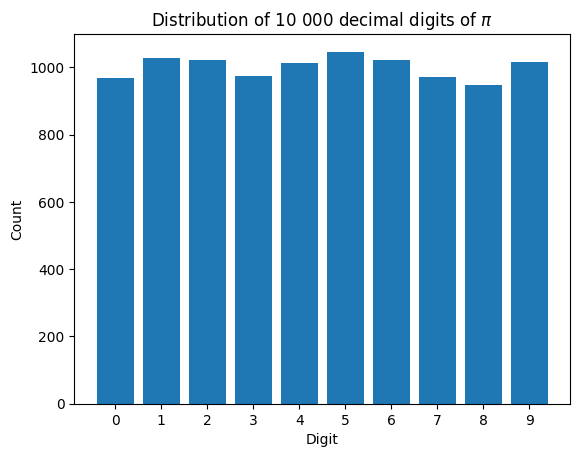

In [3]:
digits = pd.read_table("data/digits.dat", header=None).T
digits.columns = ["pi", "e"]

# plt.hist(digits['pi'])
# plt.show()

plt.bar(digits.index, digits['pi'])

plt.xticks(digits.index)

plt.title(f"Distribution of 10 000 decimal digits of $\\pi$")
plt.xlabel("Digit")
plt.ylabel("Count")

plt.show()

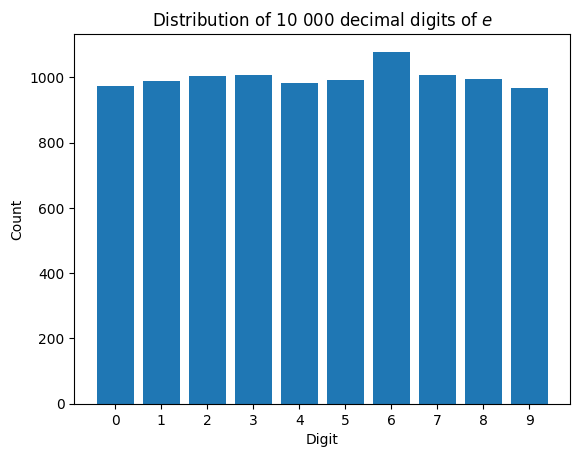

In [4]:
plt.bar(digits.index, digits['e'])

plt.xticks(digits.index)

plt.title(f"Distribution of 10 000 decimal digits of $e$")
plt.xlabel("Digit")
plt.ylabel("Count")

plt.show()


Let's try something else. Scientists have measured the percentage of silica ($\text{SiO}_2$, sand / glass) for 22 meteors. You can find it in `silica.dat`. How are these distributed? What is a "typical" percentage? Is there such percentage at all?

Print the mean, standard deviation (you can use the biased or unbiased formula), skewness and kurtosis of the distribution. What do these numbers tell you? How do they relateto the shape of the distribution? Can you characterize the distribution better? (An idea would be to characterize different parts of it on their own, as if they're different distributions.)

In [5]:
silica = pd.read_table("data/silica.dat", header=None)
silica.columns = ["Silica"]
silica


,Silica
0,20.77
1,22.56
2,22.71
3,22.99
4,26.39
5,27.08
6,27.32
7,27.33
8,27.57
9,27.81


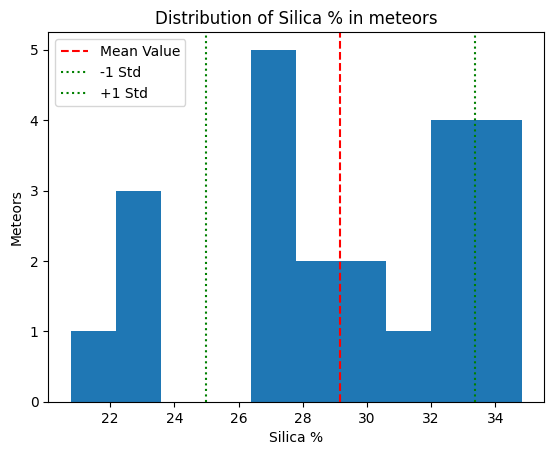

In [6]:
column = 'Silica'

mean_value = np.mean(silica[column])
std = np.std(silica[column])
plt.hist(silica[column], bins=10)

plt.title("Distribution of Silica % in meteors")
plt.xlabel("Silica %")
plt.ylabel("Meteors")

plt.axvline(mean_value, color='red', linestyle='dashed', label='Mean Value')
plt.axvline(mean_value - std, color='green', linestyle='dotted', label='-1 Std')
plt.axvline(mean_value + std, color='green', linestyle='dotted', label='+1 Std')

plt.legend()
plt.show()

### Problem 2. Categorical Variables. Comparing Categories
In addition to numeric variables (like age and salary), in statistics we also use **categorical variables**. These are descriptions of quality (as opposed to quantity). Such variables can be gender, smoker / non-smoker, results of a medical study (healthy / not healthy), colors (red, green, blue), etc. To plot values of categories, we use *bar charts*. Since category names can be long, it's sometimes useful to plot the lines horizontally.

<p style="color: #d9534f"><strong>There is a very significant difference between histograms and bar charts. Histograms are used to plot the frequency distribution of one numeric variable. Bar charts are used to plot categorical variables - how each value compares to other values.</strong></p>

The dataset `budget.dat` contains the figures for the eight main items in the US budget for 1978 and 1979 in billions
of dollars.

Display the two budgets separately. Use `xlabel()` (or `ylabel()` if your plot is horizontal) to write the names of each category. You can use [this](https://matplotlib.org/examples/pylab_examples/barchart_demo.html) and [this](https://matplotlib.org/examples/pylab_examples/barchart_demo2.html) examples as a guide.

Create another variable which shows the difference in budget $\Delta b = b_{1979} - b_{1978}$. Add this variable to the dataset (find out how). Plot it. How does the budget differ?

Since the numbers are different, a better comparison will be if we convert them to percentages of the total budget. Create two more variables for 1978 and 1979 and add them to the dataset. Plot these now. Also plot the difference in percentage, like you did before.

In [7]:
budget = pd.read_table("data/budget.dat")
budget


,Category,1978,1979
0,Military spending,107.6,117.8
1,Social security,103.9,115.1
2,Health care,44.3,49.7
3,Debt service,43.8,49.0
4,Welfare,43.7,44.9
5,Education,27.5,30.4
6,Energy,19.9,21.8
7,Veteran's benefits,18.9,19.3


In [8]:
budget_total_spending = pd.read_table("data/budget.dat")
budget_total_spending.sum()
#Total expenses by category

Category    Military spendingSocial securityHealth careDeb...
1978                                                    409.6
1979                                                    448.0
dtype: object

In [9]:
budget_total_spending['Difference [1979 - 1978]'] = budget_total_spending['1979'] - budget_total_spending['1978']
budget_total_spending
#ADD 'Difference' column which calculate expenses for 1979 minus 1978

,Category,1978,1979,Difference [1979 - 1978]
0,Military spending,107.6,117.8,10.2
1,Social security,103.9,115.1,11.2
2,Health care,44.3,49.7,5.4
3,Debt service,43.8,49.0,5.2
4,Welfare,43.7,44.9,1.2
5,Education,27.5,30.4,2.9
6,Energy,19.9,21.8,1.9
7,Veteran's benefits,18.9,19.3,0.4


In [10]:
sorted_budget_1978 = budget.sort_values('1978')
sorted_budget_1978['1978']

7     18.9
6     19.9
5     27.5
4     43.7
3     43.8
2     44.3
1    103.9
0    107.6
Name: 1978, dtype: float64

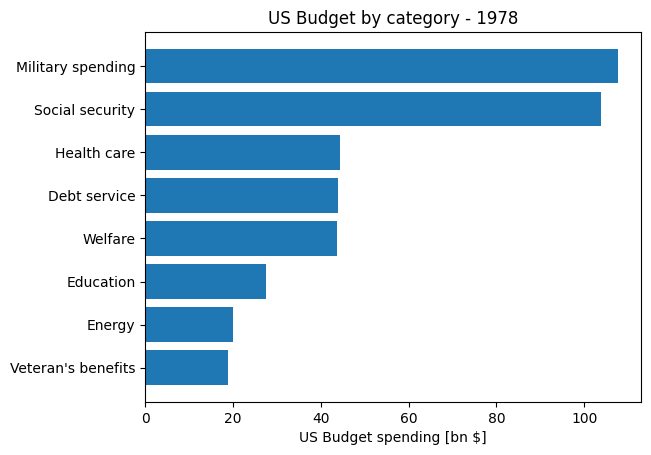

In [11]:
plt.barh(sorted_budget_1978.Category, sorted_budget_1978['1978'])

plt.title("US Budget by category - 1978")
plt.xlabel("US Budget spending [bn $]")

plt.show()


In [12]:
sorted_budget_1979 = budget.sort_values('1979')
sorted_budget_1979['1979']

7     19.3
6     21.8
5     30.4
4     44.9
3     49.0
2     49.7
1    115.1
0    117.8
Name: 1979, dtype: float64

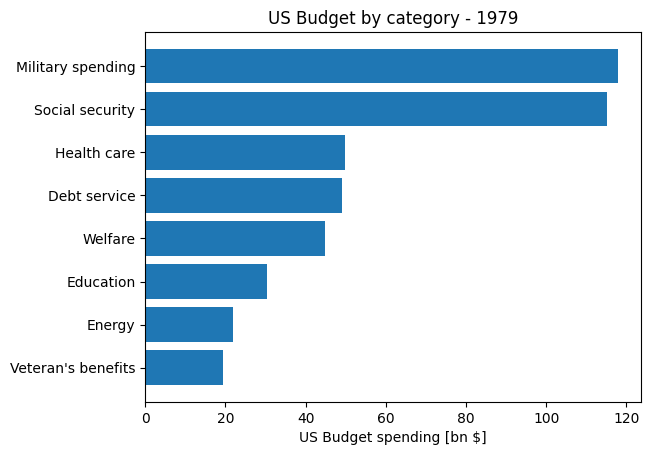

In [13]:
plt.barh(sorted_budget_1979.Category, sorted_budget_1979['1979'])

plt.title("US Budget by category - 1979")
plt.xlabel("US Budget spending [bn $]")

plt.show()

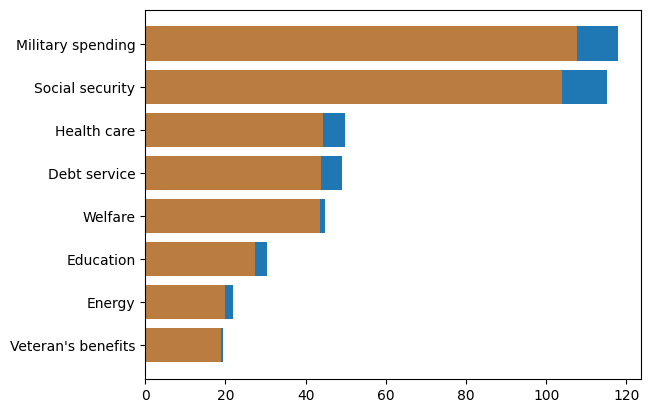

In [14]:
plt.barh(sorted_budget_1978.Category, sorted_budget_1978["1979"])
plt.barh(sorted_budget_1979.Category, sorted_budget_1978["1978"], alpha=0.7)
plt.show()

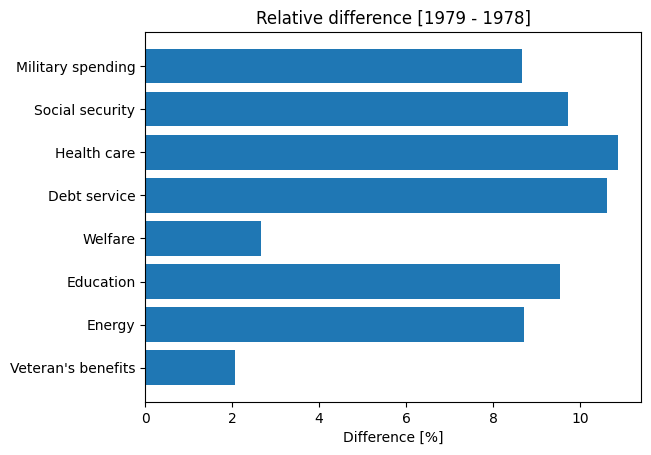

In [15]:
plt.barh(budget_total_spending.Category, budget_total_spending['Difference [1979 - 1978]'] / budget_total_spending['1979'] * 100)

plt.title("Relative difference [1979 - 1978]")
plt.xlabel("Difference [%]")

plt.gca().invert_yaxis()
plt.show()

|### Problem 3. Correlations between Variables. Alcohol and Tobacco Usage
The dataset `alcohol_tobacco.dat` shows the average weekly household spending, in British pounds, on tobacco products and alcoholic beverages for each of the 11 regions of Great Britain.

Create a scatter plot. Print the correlation coefficient. You can use the **correlation matrix** (find out how).

There's a major outlier. Which one is it?

Remove the outlier from the dataset (find out how). Calculate the correlation coefficient once again. It should be much higher.

This example is useful to show what an outlier is, and how an outlier can influence the results of an experiment.

**Note:** Be careful with outliers. Sometimes they indicate human error (e.g. human height 1588 cm is obviously wrong) but sometimes they indicate important patterns in the data. Should you remove, replace, or leave them is a difficult question and should be answered separately for each dataset.

In [16]:
data = pd.read_table('data/alcohol_tobacco.dat')
data
#Read data from alcohol_tobacco.dat, just for information

,Region,Alcohol,Tobacco
0,North,6.47,4.03
1,Yorkshire,6.13,3.76
2,Northeast,6.19,3.77
3,East Midlands,4.89,3.34
4,West Midlands,5.63,3.47
5,East Anglia,4.52,2.92
6,Southeast,5.89,3.20
7,Southwest,4.79,2.71
8,Wales,5.27,3.53
9,Scotland,6.08,4.51


In [17]:
correlation = data[["Alcohol", "Tobacco"]].corr()
correlation
#Check correlation between data in the columns

,Alcohol,Tobacco
Alcohol,1.000000,0.223572
Tobacco,0.223572,1.000000


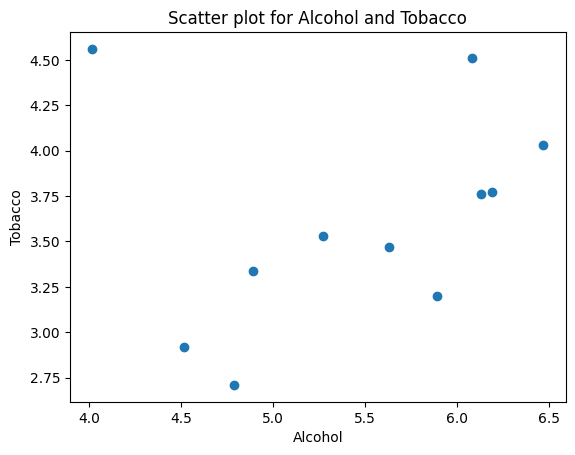

In [18]:
scatter_data = plt.scatter(data.Alcohol, data.Tobacco)
plt.title("Scatter plot for Alcohol and Tobacco")
plt.xlabel("Alcohol")
plt.ylabel("Tobacco")

plt.show(scatter_data)

In [19]:
data_filtered = data[
    (data.Alcohol >= 4.5) |
    (data.Tobacco <= 4.25)
]

data_filtered

,Region,Alcohol,Tobacco
0,North,6.47,4.03
1,Yorkshire,6.13,3.76
2,Northeast,6.19,3.77
3,East Midlands,4.89,3.34
4,West Midlands,5.63,3.47
5,East Anglia,4.52,2.92
6,Southeast,5.89,3.20
7,Southwest,4.79,2.71
8,Wales,5.27,3.53
9,Scotland,6.08,4.51


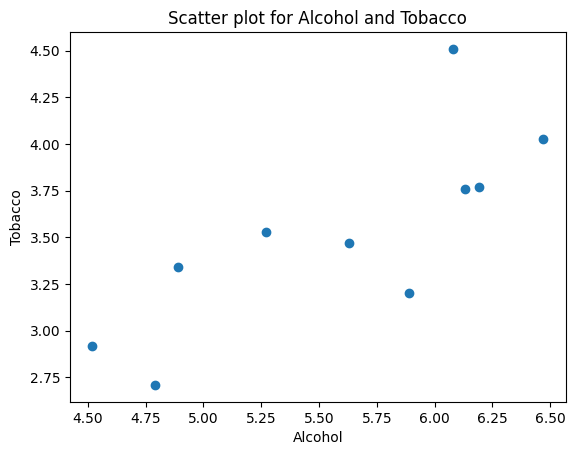

In [20]:
scatter_data_filtered = plt.scatter(data_filtered.Alcohol, data_filtered.Tobacco)
plt.title("Scatter plot for Alcohol and Tobacco")
plt.xlabel("Alcohol")
plt.ylabel("Tobacco")

plt.show(scatter_data)

In [21]:
correlation_data_filtered = data_filtered[["Alcohol", "Tobacco"]].corr()
correlation_data_filtered

,Alcohol,Tobacco
Alcohol,1.000000,0.784287
Tobacco,0.784287,1.000000


 ### Problem 4. Simulation
Another prediction technique based on statistics, is simulation. This means recreating a system's parameters and running the experiment on a computer instead of running it in real life. Simulation can give us many insights. It's useful for prediction, "what-if" analysis, etc. It's also very useful if we have very limited "real experimentation" resources and want to narrow down our possibilities.

Let's see how we can simulate the profit of a grocery shop.

The profit is dependent on the customers and what items they buy. Let's assume that the number of customers per months follows a normal distribution with mean 500 and standard deviation 20.

$$ C \sim N(500, 20) $$

In the shop, there are several items, each having a different popularity. The popularity represents the probability of buying each item.

| Item               | Price | Popularity |
|--------------------|-------|------------|
| Bread              | 0.99  | 0.5        |
| Milk               | 2.89  | 0.15       |
| Eggs, dozen        | 2.00  | 0.2        |
| Chicken fillet, kg | 6.39  | 0.15       |

Each customer buys *exactly one* article at random. Each customer will generate an expected profit equal to $\text{price} . \text{popularity}$. Total profit: sum of all profits.

In [22]:
def get_customer_profit():
    n = np.random.random()
    if n <= 0.5:
        return 0.99
    elif n < 0.65:
        return 2.89
    elif n <= 0.85:
        return 2
    else:
        return 6.39

In [23]:
get_customer_profit()
#Here we check how the function works

0.99

In [24]:
days = 1000
def run_simulation():
    profits = []
    for day in range(days):
        customers = np.floor(np.random.normal(500, 20))
        profit = sum([get_customer_profit() for c in np.arange(customers)])
        profits.append(profit)
    return profits

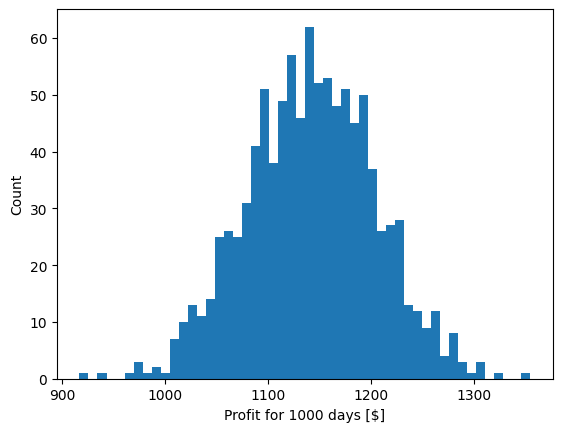

In [25]:
profits = run_simulation()
plt.hist(profits, bins = 50)
plt.xlabel("Profit for " + str(days) + " days [$]")
plt.ylabel("Count")
plt.show()

Now we can answer questions like:
* What's the probability of profit less than \$1100? 
* What's the probability of profit between \$1300 and \$1400?

We can also change our model. Let's suppose now that one customer can take 1, 2 or 3 items, with probabilities 0.5, 0.3 and 0.2 respectively. The picked items are independent. How does this change the distribution?

In [26]:
def get_customer_profit_many_items(items = 1):
    customer_sum = sum([get_customer_profit() for i in range(items)])
    return customer_sum

def get_total_customer_profit():
    n = np.random.random()
    if n <= 0.5:
        return get_customer_profit_many_items(1)
    elif n <= 0.8:
        return get_customer_profit_many_items(2)
    else:
        return get_customer_profit_many_items(3)

In [27]:
def run_simulation_many_items():
    days = 1000
    profits_many_items = []
    for day in range(days):
        customers = np.floor(np.random.normal(500, 20))
        profit = sum([get_total_customer_profit() for c in np.arange(customers)])
        profits_many_items.append(profit)
    return profits_many_items

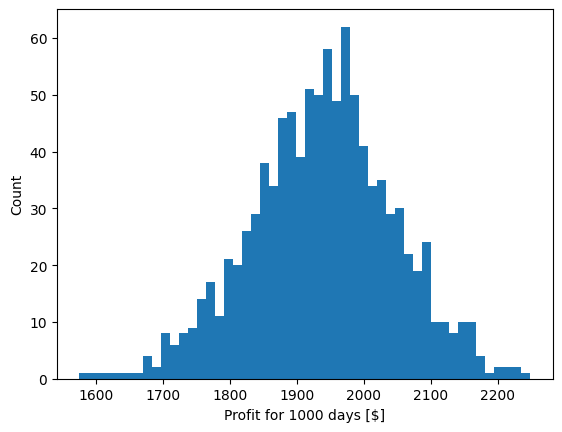

In [28]:
profits_many_items = run_simulation_many_items()
plt.hist(profits_many_items, bins = 50)
plt.xlabel("Profit for " + str(days) + " days [$]")
plt.ylabel("Count")
plt.show()

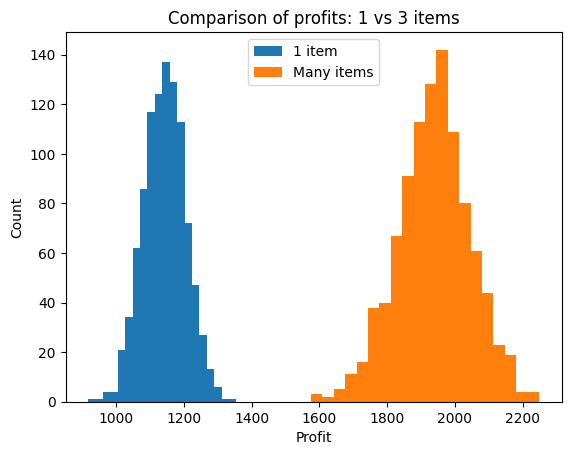

In [29]:
plt.title("Comparison of profits: 1 vs 3 items")
plt.hist(profits, bins = 20, label="1 item")
plt.hist(profits_many_items, bins = 20, label="Many items")
plt.xlabel("Profit")
plt.ylabel("Count")
plt.legend()
plt.show()

 ### ** Problem 5. Monte Carlo Simulation
One common technique to apply simulations is called **Monte Carlo simulation**. It's similar to the simulation from the previous example. The main idea is to use random sampling to solve deterministic problems.

Research what these simulations are. Give examples. Implement at least one case of a Monte Carlo simulation. You can use the following checklist to help with your research and work:
* What is a simulation?
    * How is simulation used in science?
    * Why is a simulation useful?
* How are statistics useful in simulation? How can we simulate unknown, random processes?
* What is a Monte Carlo simulation (also known as "Monte Carlo method")?
* A common use of Monte Carlo methods is numeric integration
    * Define the problem. Propose the solution. Implement it and test with some common functions
    * How does this method compare to other methods, e.g. the trapezoidal rule? Compare the performance (accuracy and time to execute) of both methods
* Apply Monte Carlo simulation to a real-life system. There are many examples. You can see [Wikipedia](https://en.wikipedia.org/wiki/Monte_Carlo_method#Applications) or some other resource for inspiration.

In [30]:
spotify_data = pd.read_csv("data/music_genre.csv")
spotify_data

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


In [31]:
spotify_data.shape
#18 columns and 50005 rows

(50005, 18)

In [32]:
#Get all songs of the specific artist
def get_track_names(artist_name):
    artist_songs = spotify_data[spotify_data['artist_name'] == artist_name]
    
    return artist_songs

get_track_names('Shlump')

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
9,56950.0,Shlump,Lazer Beam,22.0,0.00934,0.578,204800.0,0.731,0.011200,A,0.1110,-7.091,Minor,0.1730,139.933,4-Apr,0.203,Electronic
413,27281.0,Shlump,Like a Drug,25.0,0.00674,0.652,276167.0,0.806,0.786000,F#,0.0656,-6.394,Minor,0.0467,139.931,4-Apr,0.231,Electronic
2177,69171.0,Shlump,Bounce,30.0,0.03550,0.607,200993.0,0.943,0.352000,B,0.4700,-7.774,Minor,0.4860,155.142,4-Apr,0.350,Electronic
2698,33268.0,Shlump,Top Shotta,25.0,0.01030,0.654,301573.0,0.765,0.025100,D,0.0946,-6.296,Major,0.0547,140.06799999999998,4-Apr,0.224,Electronic
2705,90615.0,Shlump,Flying Saucer,32.0,0.02510,0.485,248471.0,0.842,0.000806,A,0.3070,-6.617,Major,0.2660,141.873,4-Apr,0.193,Electronic
3857,32678.0,Shlump,Badmon feat. Majah,22.0,0.00943,0.589,258207.0,0.727,0.346000,F,0.0943,-8.006,Minor,0.0740,145.086,4-Apr,0.142,Electronic
4287,30107.0,Shlump,Arabian Acid,23.0,0.08310,0.559,218445.0,0.744,0.202000,E,0.1160,-7.899,Minor,0.1160,?,4-Apr,0.140,Electronic


In [33]:
spotify_data.instance_id.value_counts()[spotify_data.instance_id.value_counts() > 1]

Series([], Name: count, dtype: int64)

In [34]:
spotify_data[spotify_data.instance_id.isna()]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
spotify_data = pd.read_csv("data/music_genre.csv")
spotify_data

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


# What does the popularity of a song depend on?

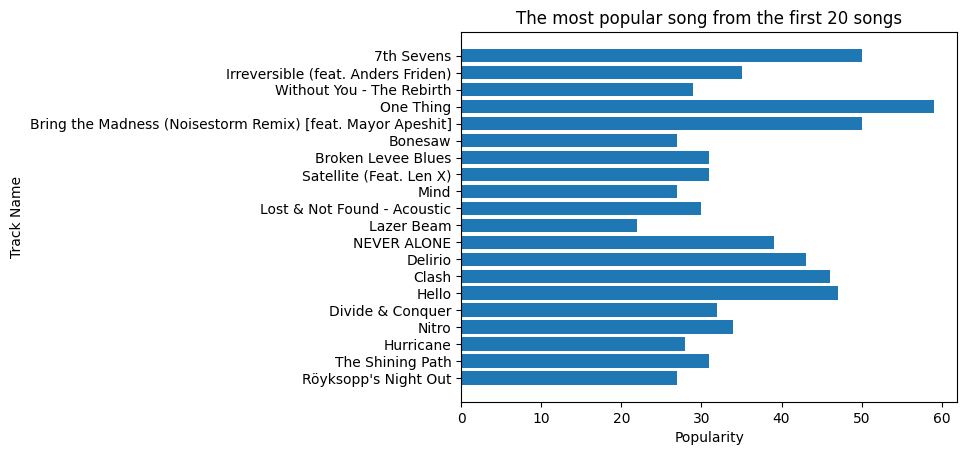

In [36]:
#Here we see the popularity of the first 20 songs
current_data = spotify_data[:20]
y_axis = current_data['popularity']
x_axis = current_data['track_name']

plt.xlabel('Popularity')
plt.ylabel('Track Name')
plt.title('The most popular song from the first 20 songs')

plt.barh(x_axis, y_axis)
plt.show()

In [37]:
popularity = current_data['popularity']

acousticness = current_data['acousticness']
danceability = current_data['danceability']
duration_ms = current_data['duration_ms']
energy = current_data['energy']
instrumentalness = current_data['instrumentalness']
liveness = current_data['liveness']
loudness = current_data['loudness']
speechiness = current_data['speechiness']
valence = current_data['valence']


correlation_between_popularity_and_acousticness = current_data[["popularity", "acousticness", ]].corr()
correlation_between_popularity_and_acousticness

,popularity,acousticness
popularity,1.00000,-0.14086
acousticness,-0.14086,1.00000


In [38]:
correlation_between_popularity_and_danceability = current_data[["popularity", "danceability"]].corr()
correlation_between_popularity_and_danceability

,popularity,danceability
popularity,1.000000,-0.257027
danceability,-0.257027,1.000000


In [39]:
correlation_between_popularity_and_duration_ms = current_data[["popularity", "duration_ms"]].corr()
correlation_between_popularity_and_duration_ms

,popularity,duration_ms
popularity,1.000000,0.206562
duration_ms,0.206562,1.000000


In [40]:
correlation_between_popularity_and_energy = current_data[["popularity", "energy"]].corr()
correlation_between_popularity_and_energy

,popularity,energy
popularity,1.000000,0.060735
energy,0.060735,1.000000


In [41]:
correlation_between_popularity_and_instrumentalness = current_data[["popularity", "instrumentalness"]].corr()
correlation_between_popularity_and_instrumentalness

,popularity,instrumentalness
popularity,1.000000,0.043951
instrumentalness,0.043951,1.000000


In [42]:
correlation_between_popularity_and_liveness = current_data[["popularity", "liveness"]].corr()
correlation_between_popularity_and_liveness

,popularity,liveness
popularity,1.000000,0.261403
liveness,0.261403,1.000000


In [43]:
correlation_between_popularity_and_loudness = current_data[["popularity", "loudness"]].corr()
correlation_between_popularity_and_loudness

,popularity,loudness
popularity,1.000000,-0.069868
loudness,-0.069868,1.000000


In [44]:
correlation_between_popularity_and_speechiness = current_data[["popularity", "speechiness"]].corr()
correlation_between_popularity_and_speechiness

,popularity,speechiness
popularity,1.00000,0.06508
speechiness,0.06508,1.00000


In [45]:
correlation_between_popularity_and_valence = current_data[["popularity", "valence"]].corr()
correlation_between_popularity_and_valence

,popularity,valence
popularity,1.000000,-0.094653
valence,-0.094653,1.000000


### ** Problem 6. Probabilistic Data Structures
A very interesting application of probability in computer science is a kind of data structures which have a probabilistic behaviour. Examples of these are **Bloom filter**, **Skip list**, **Count-min sketch** and **HyperLogLog**.

Research how one of these structures works. Or write about many of them, if you wish. You can use the following checklist as a guide:
* What is a data structure? 
* What is a probabilistic data structure?
    * Where does the probabilistic behaviour emerge?
    * What advantages do these structures provide?
* For your chosen structure, how is it constructed?
    * What parts do you need? What are the details?
* How does the structure work?
    * What operations can you do?
    * What are the typical probabilities associated with these operations?
* Analyze the structure
    * Analyze the runtimes for all operations
    * Analyze the space usage
    * Compare to a similar, non-probabilistic data structure
    * What advantages does the new data structure have? What drawbacks do you need to be aware of?
* Give at least one example where this structure is useful
    * E.g. Bloom filter - spell checkers
    * Analyze the use case
    * If possible, implement the use case
    * Display some metrics (e.g. % conserved space, % reduced time)

## Bloom filter - spell checkers
###### This filter checks if specific element exists in the collection. 
###### It's fast but there is the possibility to return a false positive answer.
###### Bloom filter is useful for search engine like google or web hashing. 
###### Anti spam systems, spell checkers. 
###### In cryptocurrency bloom filter is useful for peer-to-peer communication for filtering transactions.

In [48]:
from bloom_filter2 import BloomFilter

# Create specific object type bloom filter which is not standard python collection like list, set, dict etc.
# The collection is bitarray - main structure that store the data.
bf = BloomFilter(max_elements=1000, error_rate=0.01)

bf.add('apple')
bf.add('banana')
bf.add('cherry')


In [55]:
for i in range(1000):
    bf.add(f"user-{i}")

test_item = "cherry"
result = test_item in bf

print(f"{test_item.capitalize()} in bloom filter? -> {result}")
    

Cherry in bloom filter? -> True


### Step 1
###### Create Bloom filter structure. If you set max_elements=1000, It's mean bitarrey should be bigger than 1000 bits maybe.
###### Here is the formula with which Bloom filter calculate the size of bitarrey.

$$
m = -\frac{n \cdot \ln(p)}{(\ln 2)^2}
$$

- \( n \) count of elements (max size)
- \( p \) false positive rate

### Stem 2
###### When we use "Add" function bf.add("apple") - this word is hashed. Depends on this hash we find the index in the structure that will be changed.

In [57]:
import hashlib

hash_hex = hashlib.sha256("apple".encode()).hexdigest()
print(hash_hex)

3a7bd3e2360a3d29eea436fcfb7e44c735d117c42d1c1835420b6b9942dd4f1b


In [58]:
hash_int = int(hash_hex, 16)
print(hash_int)

26452929773915387181124022930352263286101059613432915788569047929437325971227


In [60]:
index = hash_int % 1000
index

227

In [ ]:
index = 227

###### Index 227 in the bitarrаy structure is changed from 0 to 1 and when we search any word, the algorithm check index 227 - if is 0 - false otherwise true.